In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [4]:
build_k_indices(y, 4, 1)

array([[27, 35, 40, 38,  2,  3, 48, 29, 46, 31, 32, 39],
       [21, 36, 19, 42, 49, 26, 22, 13, 41, 17, 45, 24],
       [23,  4, 33, 14, 30, 10, 28, 44, 34, 18, 20, 25],
       [ 6,  7, 47,  1, 16,  0, 15,  5, 11,  9,  8, 12]])

In [45]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""

    # get k'th subgroup in test, others in train
    train_indices = [x for j, x in enumerate(k_indices) if j != k]
    train_indices = [idx for part in train_indices for idx in part]
    test_indices = k_indices[k]
    
    x_train = x[train_indices]
    y_train = y[train_indices]
    
    x_test = x[test_indices]
    y_test = y[test_indices]

    # form data with polynomial degree
    train_poly = build_poly(x_train, degree)
    test_poly = build_poly(x_test, degree)

    # ridge regression
    
    weights_train, loss_tr = ridge_regression(y_train, train_poly, lambda_)

    # calculate the loss for train and test data
    loss_te = compute_loss(y_test, test_poly, weights_train)

    return loss_tr, loss_te

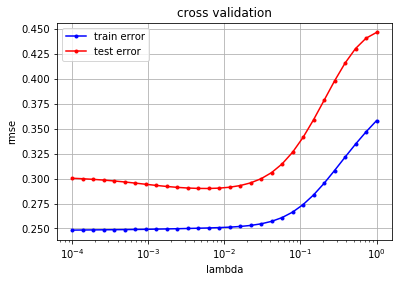

In [46]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    # cross validation
    for lambda_ in lambdas:
        loss_tr_tmp = []
        loss_te_tmp = []
        
        for i_test in range(k_fold): 
            loss_tr, loss_te = cross_validation(y, x, k_indices, i_test, lambda_, degree)
            loss_tr_tmp.append(loss_tr)
            loss_te_tmp.append(loss_te)
            
        loss_train = np.mean(loss_tr_tmp)
        loss_test = np.mean(loss_te_tmp)
        rmse_tr.append(np.sqrt(2*loss_train))
        rmse_te.append(np.sqrt(2*loss_test))
        
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

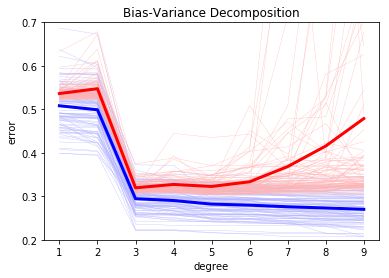

In [50]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T

        # split data with a specific seed
        x_train, x_test, y_train, y_test = split_data(x, y, ratio_train, seed)
        
        # bias_variance_decomposition
        for index_deg, deg in enumerate(degrees):
            
            # form data with polynomial degree
            train_poly = build_poly(x_train, deg)
            test_poly = build_poly(x_test, deg)
            
    
            w_train, loss_train = least_squares(y_train, train_poly)

            # calculate the loss for train and test data
            loss_test = compute_loss(y_test, test_poly, w_train)
            
            rmse_tr[index_seed][index_deg] = np.sqrt(2*loss_train)
            rmse_te[index_seed][index_deg] = np.sqrt(2*loss_test)
            

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()